In [6]:
import numpy as np
import matplotlib.pyplot as plt
from thinkdsp import Chirp
from thinkdsp import normalize, unbias
from thinkdsp import decorate
pi2 = 2 * np.pi

class LYJTromebone(Chirp):

    def _evaluate(self, ts, freqs):

        M = numpy.diff(ts)
        N =  pi2*freqs*M
        ps = np.cumsum(N)
        ps = np.insert(ps, 0, 0)
        cycles = ps / pi2
        frac = np.modf(cycles)
        ys =  normalize(unbias(frac), self.amp)
        return ys

In [7]:
signal = LYJTromebone(start=220, end=440)
wave = signal.make_wave(duration=1, framerate=4000)
wave.apodize()
wave.make_audio()

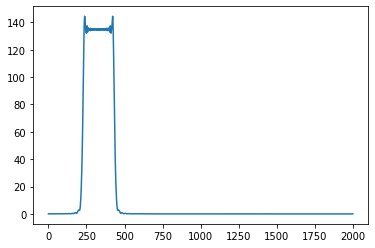

In [8]:
wave.make_spectrum().plot()